# Keras and TensorFlow

## TensorFlow

* Open source library for graph-based numerical computation (??)
* Low and high level APIs
  * Addition, multiplication, differentiation
  * Machine learning models

References:

* [TensorFlow Website](https://www.tensorflow.org/)
* [Introduction to TensorFlow in Python](https://campus.datacamp.com/courses/introduction-to-tensorflow-in-python)
* [Introduction to Deep Learning in Python](https://campus.datacamp.com/courses/introduction-to-deep-learning-in-python)
* [Advanced Deep Learning with Keras](https://campus.datacamp.com/courses/advanced-deep-learning-with-keras/the-keras-functional-api)

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

## Defining tensors

A tensor is a genrealization of vectors and matrices. Like a collection of numbers arranged in a particular shape. Imagine a loaf of bread, cut into slices, and the slices are cut into 9 pieces. A piece of the slice is a 0 dimensional vector. A row or column of pieces is a 1 dimensional vector. A whole slice is a 2 dimensional vector. The whole loaf is a 3 dimensional vector.

Tensors are used to used to define the data flow through the model.

### 0d

Here is a "scalar" or "rank-0" tensor . A scalar contains a single value, and no "axes".

In [211]:
print(tf.constant(5).numpy())

5


### 1d

A "vector" or "rank-1" tensor is like a list of values. A vector has 1-axis:

In [212]:
print(tf.constant([2.0, 3.0, 4.0]).numpy())

[2. 3. 4.]


In [213]:
print(tf.constant([5]).numpy())

[5]


### 2d

A "matrix" or "rank-2" tensor has 2-axes:

In [214]:
print(tf.constant([[1, 2], [3, 4], [5, 6]], dtype=tf.float16).numpy())

[[1. 2.]
 [3. 4.]
 [5. 6.]]


### 3d

In [215]:
d3 = tf.ones((2, 2, 2))
print(d3.numpy())

[[[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]]


## Constants

* A constant is the simplest category of tensor
  * It's not trainable (??)
  * Can have any dimension
* `shape` is `[rows, columns]`

In [216]:
print(tf.constant(3, shape=[2, 3]).numpy())

[[3 3 3]
 [3 3 3]]


In [217]:
print(tf.constant([1, 2, 3, 4], shape=[2, 2]).numpy())

[[1 2]
 [3 4]]


### Zeros

In [218]:
print(tf.zeros([2, 2]).numpy())

[[0. 0.]
 [0. 0.]]


### Zeros Like

In [219]:
a = tf.constant(4, shape=[2, 3]).numpy()
print(tf.zeros_like(a).numpy())

[[0 0 0]
 [0 0 0]]


### Ones

In [220]:
# Lists work:
print(tf.ones([2, 2]).numpy())

# So do tuples:
print()
print(tf.ones((2, 2)).numpy())

[[1. 1.]
 [1. 1.]]

[[1. 1.]
 [1. 1.]]


In [221]:
print(tf.ones((2, 2)).numpy())

[[1. 1.]
 [1. 1.]]


### Ones Like

In [222]:
a = tf.constant(4, shape=[2, 3]).numpy()
print(tf.ones_like(a).numpy())

[[1 1 1]
 [1 1 1]]


### Fill

In [223]:
print(tf.fill([3, 3], 7).numpy())

[[7 7 7]
 [7 7 7]
 [7 7 7]]


### Creating a constnat from a numpy array

In [224]:
arr = np.array([5, 6, 7])
b = tf.constant(arr)
print(b.dtype)
print(b.numpy())
print(b.shape)

<dtype: 'int64'>
[5 6 7]
(3,)


## Variables

* Unlike a constant, a variable's value can be changed
* Data type and shape are fixed

In [225]:
# dtype could also be like tf.float32
a0 = tf.Variable([1, 2, 3], dtype=tf.int16)
print("Varible:", a0.numpy())

b = tf.constant(2, tf.int16)
print("Constant:", b.numpy())

c1 = a0 * b
print("Multiplication method 1:", c1.numpy())
print("Multiplication method 2:", tf.multiply(a0, b).numpy())

# "Note that tensorflow 2 allows you to use data as either a numpy array 
# or a tensorflow constant object. Using a constant will ensure that any 
# operations performed with that object are done in tensorflow."
print("Multiplication method 3:", tf.multiply([1, 2, 3], [2]).numpy())
print("Multiplication method 4:", tf.multiply(np.array([1, 2, 3]), np.array([2])).numpy())

Varible: [1 2 3]
Constant: 2
Multiplication method 1: [2 4 6]
Multiplication method 2: [2 4 6]
Multiplication method 3: [2 4 6]
Multiplication method 4: [2 4 6]


## Operations

### Element wise operations

In [226]:
a = tf.constant([1])
b = tf.constant([2])
print(tf.add(a, b).numpy())

[3]


In [227]:
a = tf.constant([1, 5])
b = tf.constant([3, 10])
print(tf.add(a, b).numpy())

[ 4 15]


In [228]:
a = tf.constant([1, 5])
b = tf.constant([3, 10])
print(tf.multiply(a, b).numpy())

[ 3 50]


In [229]:
a = tf.constant([1, 2, 3, 4], shape=[2, 2])
b = tf.constant([5, 6, 7, 8], shape=[2, 2])

print("a:\n", a.numpy())
print("\nb:\n", b.numpy())
print("\na + b:\n", tf.add(a, b).numpy())
print("\na + b:\n", (a + b).numpy())

a:
 [[1 2]
 [3 4]]

b:
 [[5 6]
 [7 8]]

a + b:
 [[ 6  8]
 [10 12]]

a + b:
 [[ 6  8]
 [10 12]]


### Matrix Multiplication

* [Multiplying a Matrix by Another Matrix](https://www.mathsisfun.com/algebra/matrix-multiplying.html)
* To multiple matrix `a` by matrix `b`, `b` must have the same number of rows as `a` has columns since we're taking a dot product

In [230]:
a = tf.constant([1, 2, 3, 4], shape=[2, 2])
b = tf.constant([5, 6, 7, 8], shape=[2, 2])

print("a:\n", a.numpy())
print("\nb:\n", b.numpy())
print("\na * b:\n", tf.matmul(a, b).numpy())
print("\na * b:\n", (a @ b).numpy())

# 1 * 5 + 2 * 7 = 19
# 1 * 6 + 2 * 8 = 22
# 3 * 5 + 4 * 7 = 34
# 3 * 6 + 4 * 8 = 50

a:
 [[1 2]
 [3 4]]

b:
 [[5 6]
 [7 8]]

a * b:
 [[19 22]
 [43 50]]

a * b:
 [[19 22]
 [43 50]]


In [231]:
features = tf.constant([2, 3, 4, 5], shape=[2, 2])
coefficients = tf.constant([1000, 50], shape=[2, 1])
predictions = tf.matmul(features, coefficients)

print("features:\n", features.numpy())
print("\ncoefficients:\n", coefficients.numpy())
print("\npredictions:\n", predictions.numpy())

features:
 [[2 3]
 [4 5]]

coefficients:
 [[1000]
 [  50]]

predictions:
 [[2150]
 [4250]]


### Summing over tensor dimensions

In [232]:
a = tf.ones([2, 3, 4])

# 24 because it's a 2 x 3 x 4 dimensional tensor with each element being 1
tf.reduce_sum(a).numpy()

24.0

In [233]:
# We reduce the size of the tensor by summing over one of its dimensions
print("\nDimension 0:\n", tf.reduce_sum(a, 0).numpy()) # A 3x4 tensor
print("\nDimension 1:\n", tf.reduce_sum(a, 1).numpy()) # A 2x4 tensor
print("\nDimension 2:\n", tf.reduce_sum(a, 2).numpy()) # A 2x3 tensor


Dimension 0:
 [[2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]]

Dimension 1:
 [[3. 3. 3. 3.]
 [3. 3. 3. 3.]]

Dimension 2:
 [[4. 4. 4.]
 [4. 4. 4.]]


In [234]:
a = tf.constant([3, 4, 5, 6], shape=[2, 2])
print("a:\n", a.numpy())

print("\nTotal sum:\n", tf.reduce_sum(a).numpy())

# Reducing along rows (axis=0) means we're squeezing from bottom and top so that
# the separate rows become one row. This gives is the column sums.
print("\nColumn sums:\n", tf.reduce_sum(a, 0).numpy())

# Reducing along columns (axis=1) means we're squeezing from left and right so that
# the separate columns become one column. This gives us the row sums.
print("\nRow sums:\n", tf.reduce_sum(a, 1).numpy())

a:
 [[3 4]
 [5 6]]

Total sum:
 18

Column sums:
 [ 8 10]

Row sums:
 [ 7 11]


## Gradient

Computes the slope of a function at a point.

In [235]:
# We'll find the minumum for y = x ** 2

# Define x
x = tf.Variable(-1.0)

# Define y within an instance of GradientTape
# This allows us to computer the rate of change of y with respect to x
with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.multiply(x, x)

# Evaluate the gradient of y with respect to x at x = -1
g = tape.gradient(y, x)
print("Slope at {}: {}:".format(x.numpy(), g.numpy()))

# Recall from calc that the derivative for y = x ** 2 is 2x
# So the derivative at x = -1 is 2 * -1 = -2

Slope at -1.0: -2.0:


## Reshape

Reshapes a tensor (like a 10x10 into a 100x1)

In [236]:
a = tf.constant([1, 2, 3, 4], shape=[2, 2])
print("Original 2x2:\n", a.numpy())
print("\nReshaped into 4x1 using list:\n", tf.reshape(a, [4, 1]).numpy())
print("\nRehsaped into a 4x1 using tuple:\n", tf.reshape(a, (4, 1)).numpy())

Original 2x2:
 [[1 2]
 [3 4]]

Reshaped into 4x1 using list:
 [[1]
 [2]
 [3]
 [4]]

Rehsaped into a 4x1 using tuple:
 [[1]
 [2]
 [3]
 [4]]


## Random

Populates a tensor with entries drawn from a probability distribution

### Float between 0 and 1

In [237]:
a = tf.random.uniform([2, 2])
print(a.numpy())

[[0.9453641  0.19514918]
 [0.83159983 0.9215629 ]]


### Float between 0 and n

In [238]:
a = tf.random.uniform([2, 2], maxval=10)
print(a.numpy())

[[8.971273 4.00175 ]
 [2.660606 5.992365]]


### Integer between 0 and n

In [239]:
a = tf.random.uniform([2, 2], maxval=10, dtype="int32")
print(a.numpy())

[[0 8]
 [2 0]]


## Casting

### Integer to boolean

In [240]:
series = pd.Series([1, 0, 1, 1])
print(tf.cast(series, tf.bool).numpy())

[ True False  True  True]


### Integer to float

In [241]:
series = pd.Series([23, 45, 67])
print(tf.cast(series, tf.float32).numpy())

[23. 45. 67.]


## Loss Functions

In [242]:
# Note that if you pass lists of integers then TensorFlow will return an integer (12) not 12.5
targets = [10.0, 12.0]
predictions = [14.0, 9.0]
tf.keras.losses.mse(targets, predictions).numpy()

# Sum the squares of predicitons minus targets: (14 - 10)** 2 + (9 - 12) ** 2 = 16 + 9 = 25
# Divide by number of observations = 25 / 2 = 12.5

12.5

From [DataCamp example](https://campus.datacamp.com/courses/introduction-to-tensorflow-in-python/63343?ex=6):

In [243]:
features = tf.constant([1, 2, 3, 4, 5], tf.float32)
targets = tf.constant([2, 4, 6, 8, 10], tf.float32)
scalar = tf.Variable(1.0, tf.float32)

# Define the model
def model(scalar, features = features):
    return scalar * features

# Define a loss function
def loss_function(scalar, features = features, targets = targets):
    # Compute the predicted values
    predictions = model(scalar, features)
    
    # Return the mean absolute error loss
    return tf.keras.losses.mae(targets, predictions)

# Evaluate the loss function and print the loss
print(loss_function(scalar).numpy())

3.0


## Training a Linear Model

Modified example inspired by a [DataCamp exercise](https://campus.datacamp.com/courses/introduction-to-tensorflow-in-python/63343?ex=9):

## One parameter

In [244]:
x = np.array(range(10))
y = 10 + x * 5

# Define a linear regression model
def linear_regression(intercept, slope, features = x):
    return intercept + slope * features

# Set loss_function() to take the variables as arguments
def loss_function(intercept, slope, features, targets):
    # Set the predicted values
    predictions = linear_regression(intercept, slope, features)
    
    # Return the mean squared error loss
    return tf.keras.losses.mse(targets, predictions)

print("Training...")

# Initialize an Adam optimizer
opt = tf.keras.optimizers.Adam(0.5)

# The optimizer will adjust the intercept and slope
intercept = tf.Variable(0, dtype=tf.float32)
slope = tf.Variable(0, dtype=tf.float32)

for i in range(301):
    # Apply minimize, pass the loss function, and supply the variables
    opt.minimize(lambda: loss_function(intercept, slope, x, y), var_list=[intercept, slope])

    if i % 50 == 0:
        current_loss = loss_function(intercept, slope, x, y).numpy()
        print("MSE after", i, "iterations:", current_loss)


print("\nEstimated intercept:", intercept.numpy())
print("Estimated slope: ", slope.numpy())

Training...
MSE after 0 iterations: 1052.125
MSE after 50 iterations: 3.633875
MSE after 100 iterations: 0.40788904
MSE after 150 iterations: 0.03056418
MSE after 200 iterations: 0.0010345107
MSE after 250 iterations: 1.1735907e-05
MSE after 300 iterations: 1.2565943e-08

Estimated intercept: 9.999792
Estimated slope:  5.0000343


## Multiple parameters

In [245]:
x1 = np.arange(0, 10)
x2 = np.arange(30, 40)
actual_params = [10, 5, 25]
y = actual_params[0] + actual_params[1] * x1 + actual_params[2] * x2

print("x1:", x1)
print("x2:", x2)
print("actual params:", actual_params)
print("y:", y)

# Define a linear regression model
def linear_regression(params, feature1, feature2):
    return params[0] + params[1] * feature1 + params[2] * feature2

# Set loss_function() to take the variables as arguments
def loss_function(params, feature1, feature2, targets):
    # Set the predicted values
    predictions = linear_regression(params, feature1, feature2)
    
    # Return the mean squared error loss
    return tf.keras.losses.mse(targets, predictions)

print("\nTraining...")

# Initialize an Adam optimizer
opt = tf.keras.optimizers.Adam(0.5)

# The optimizer will adjust the intercept and slope
params = tf.Variable([0, 0, 0], dtype=tf.float32)

for i in range(2001):
    # Apply minimize, pass the loss function, and supply the variables
    opt.minimize(lambda: loss_function(params, x1, x2, y), var_list=[params])

    if i % 250 == 0:
        current_loss = loss_function(params, x1, x2, y).numpy()
        print("MSE after", i, "iterations:", current_loss)

# It comes up with different params that still work
print("\nEstimated params:", params.numpy())
print("\nPredictions:", linear_regression(params, x1, x2).numpy())

x1: [0 1 2 3 4 5 6 7 8 9]
x2: [30 31 32 33 34 35 36 37 38 39]
actual params: [10, 5, 25]
y: [ 760  790  820  850  880  910  940  970 1000 1030]

Training...
MSE after 0 iterations: 772563.25
MSE after 250 iterations: 762.1769
MSE after 500 iterations: 130.75668
MSE after 750 iterations: 11.037022
MSE after 1000 iterations: 0.4575019
MSE after 1250 iterations: 0.0088784555
MSE after 1500 iterations: 7.480383e-05
MSE after 1750 iterations: 3.0845405e-07
MSE after 2000 iterations: 3.837049e-08

Estimated params: [27.377342   5.5793157 24.420744 ]

Predictions: [ 759.99963  789.99976  819.99976  849.9998   879.9999   909.99994
  940.       970.00006 1000.0001  1030.0002 ]


## Creating a neural network using low level functions

Imagine 3 inputs, 2 hidden layer neurons, and 1 output layer

Inspired by [Introduction to TensorFlow example exercise](https://campus.datacamp.com/courses/introduction-to-tensorflow-in-python/63344?ex=2).

First, we feed the inputs to the hidden layer:

In [246]:
inputs = np.array([[2, 10, 43]], np.float32)
print("inputs:\n", inputs)

# We figure out the total net input to each hidden layer neuron, squash the 
# total net input using an activation function (here we use the sigmoid function), 
# then repeat the process with the output layer neurons.

# Initialize bias for the hidden layer
hidden_layer_bias = tf.Variable(1.0)
print("\nhidden_layer_bias:", hidden_layer_bias.numpy())

# These are the weights from the inputs to the hidden layer neurons
# It's 3 rows by 2 columns because there are 3 inputs feeding into 2 neurons
hidden_layer_weights = tf.Variable(tf.ones((3, 2)))
print("\nhidden_layer_weights:\n", hidden_layer_weights.numpy())

# Perform matrix multiplication of the features and weights1
hidden_layer_inputs_times_weights = tf.matmul(inputs, hidden_layer_weights)
# 1 * 2 + 1 * 10 + 1 * 43 = 55
print("\nhidden_layer_inputs_times_weights:\n", hidden_layer_inputs_times_weights.numpy())

# Apply sigmoid activation function to product1 + bias1
# Because the value is greater than 1, it gets squashed to 1
hidden_layer_outputs = tf.keras.activations.sigmoid(hidden_layer_inputs_times_weights + hidden_layer_bias)
print("\ndense1:\n", hidden_layer_outputs.numpy())

inputs:
 [[ 2. 10. 43.]]

hidden_layer_bias: 1.0

hidden_layer_weights:
 [[1. 1.]
 [1. 1.]
 [1. 1.]]

hidden_layer_inputs_times_weights:
 [[55. 55.]]

dense1:
 [[1. 1.]]


Then we feed the outputs of the hidden layer to the output layer:

In [247]:
output_layer_bias = tf.Variable(1.0)
output_layer_weights = tf.Variable(tf.ones((2, 1)))
output_layer_inputs_times_weights = tf.matmul(hidden_layer_outputs, output_layer_weights)
prediction = tf.keras.activations.sigmoid(output_layer_inputs_times_weights + output_layer_bias)

# "Our model produces predicted values in the interval between 0 and 1. For the example we considered, 
# the actual value was 1 and the predicted value was a probability between 0 and 1. This, of course, 
# is not meaningful, since we have not yet trained our model's parameters."
print('prediction: {:.3f}'.format(prediction.numpy()[0,0]))
print('actual: 1')

prediction: 0.953
actual: 1


## Using the high level Keras API

Here we feed the inputs into the same 2-neuron hidden layer, then the 1-neuron output layer.
We could easily add other hidden layers as well, feeding in the output of prior hidden layers.

In [248]:
inputs = np.array([[2, 10, 43]], np.float32)
# Hidden layers typically use Rectified Linear Unit (ReLu) Activation activation function which is max(0, value)
hidden_layer = tf.keras.layers.Dense(2, activation="sigmoid")(inputs)
# If this were a classification problem with 2+ output classes, we would use softmax here
# If we did, outputs could be interpreted as class probabilities in multiclass classification problems
# (each rows values would output to 1 aka 100%)
prediction = tf.keras.layers.Dense(1, activation="sigmoid")(hidden_layer)

# The output changes each time because we're using an untrained model with randomly initialized parameters
print('prediction: {:.3f}'.format(prediction.numpy()[0,0]))

prediction: 0.305


## More low level training

Also a via [DataCamp exercise](https://campus.datacamp.com/courses/introduction-to-tensorflow-in-python/63344?ex=14):

```python
# Define the model
def model(w1, b1, w2, b2, features = borrower_features):
    # Apply relu activation functions to layer 1
    layer1 = keras.activations.relu(matmul(features, w1) + b1)
    # Apply dropout
    dropout = keras.layers.Dropout(0.25)(layer1)
    return keras.activations.sigmoid(matmul(dropout, w2) + b2)

# Define the loss function
def loss_function(w1, b1, w2, b2, features = borrower_features, targets = default):
    predictions = model(w1, b1, w2, b2)
    # Pass targets and predictions to the cross entropy loss
    return keras.losses.binary_crossentropy(targets, predictions)

Train the model
for j in range(100):
    # Complete the optimizer
    opt.minimize(lambda: loss_function(w1, b1, w2, b2), 
                 var_list=[w1, b1, w2, b2])

# Make predictions with model
model_predictions = model(w1, b1, w2, b2, test_features)

# Construct the confusion matrix
confusion_matrix(test_targets, model_predictions)
```

## Dropout function

Helps prevent overfitting by randomly drops weights connected to certain nodes in a layer during the training process. Force network to develop more robust rules for classification. Tends to improve out of sample performance.

```python
# ... other layers

# Drop weights connected to 25% of the nodes randomly
dropout1 = tf.keras.layers.Dropout(0.25)(dense2)

# ... then pass that to the output layer
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(dropout)
```

## Optimizers

* Stochastic Gradient Descent (SGD)
  * Improved version of gradient descent that is less likely to get stuck in local minimums. For simple problems, SGD algorithms work well.
  * `keras.optimizers.SGD(learning_rate=0.01)`
  * `learning_rate` - between 0.5 and 0.001. Higher introduces more force.
  * Simpler and easy to interpret vs modern optimizations
* Root Mean Squared (RMS) optimizer
  * Applies different learning rates to each feature which is useful for high dimensional problems
  * `keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.99)`
  * `learning_rate`
  * `momentum`
  * `decay` - setting a low value prevents momentum from accumulating over long periods of the training process
* Adaptive Moment (Adam) optimizer
  * Generally a good first choice
  * Require 10x many iterations to achieve similar loss vs SGD
  * `beta1` - lowers momentum
  * Performs well with default parameter values


## Random

### Draw numbers from a normal distribution

In [249]:
tf.random.normal([3, 3]).numpy()

array([[ 0.16820055,  0.8850882 , -1.4864322 ],
       [ 0.2228577 ,  0.56002563, -0.20416106],
       [ 1.2134453 ,  0.03427787,  0.90148443]], dtype=float32)

### Draw numbers from a normal distribution

.. And ignore very large and very small values

In [250]:
tf.random.truncated_normal([3, 3]).numpy()

array([[-0.13662614, -0.43377414,  0.7998232 ],
       [-0.8046036 ,  1.3716617 ,  0.5730576 ],
       [ 0.10732784,  0.40168315,  1.5509814 ]], dtype=float32)

## Sequential API

via [DataCamp](https://campus.datacamp.com/courses/introduction-to-tensorflow-in-python/63345?ex=2):

```python
# Define a Keras sequential model
model = keras.Sequential()

# Define the first dense layer
# The input shape represents the number of inputs which in this example
# is 784 because we're analyzing a 28x28 image that's reshaped
model.add(keras.layers.Dense(16, activation='relu', input_shape=(784,)))

# Define the second dense layer
model.add(keras.layers.Dense(8, activation='relu'))

# Define the output layer
model.add(keras.layers.Dense(4, activation='softmax'))

# Print the model architecture
print(model.summary())
```

Then we compile it:

```python
# Define the first dense layer
model.add(keras.layers.Dense(16, activation="sigmoid", input_shape=(784,)))

# Apply dropout to the first layer's output
model.add(keras.layers.Dropout(0.25))

# Define the output layer
model.add(keras.layers.Dense(4, activation="softmax"))

# Compile the model
# We could also set the `metrics` argument to ['accuracy'] since
# reporting on the loss isn't that useful.
# Optimizer could also be `SGD` or `RMSprop`
model.compile('adam', loss='categorical_crossentropy')

# Alternative syntax for passing arguments for the optimizer
# model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print a model summary
print(model.summary())
```

## Activation Functions

* `softmax`: "The elements of the output vector are in range (0, 1) and sum to 1. Softmax is often used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution."
* `relu` (rectified linear unit): 0 if negative value, otherwise the value: `max(0, value)`
* `sigmoid`: varies between 0 and 1
* `tanh` (hyperbolic tangent): varies between -1 and 1

* ReLu is a good first choice
* Avoid sigmoid for hidden layers in deep learning models
* Tune with experimentation

## Losses

"The purpose of loss functions is to compute the quantity that a model should seek to minimize during training."

* `binary_crossentropy`: "Use this cross-entropy loss when there are only two label classes (assumed to be 0 and 1). For each example, there should be a single floating-point value per prediction."
* `categorical_crossentropy`: "Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided in a one_hot representation."

## Binary Classification Notes

There are [different approaches](https://stats.stackexchange.com/a/207067/289300) to this.

### Option 1

Output layer has 1 neuron representing the probability of the positive class.

```python
model.add(keras.layers.Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
```

### Option 2

Output layer will have a separate node for each outcome.

```python
# With softmax, the values total 1
model.add(keras.layers.Dense(2, activation="softmax"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
```

## Multiclass Classification

```python
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(optimize="adam", loss="categorical_crossentropy", metrics=["accuracy"]
```

## Multilabel Classification

For example, identifying multiple objects in an image.

```python
# With sigmoid, each value can be between 0 and 1 but unlike softmax they don't have to total 1
model.add(keras.layers.Dense(10, activation="sigmoid"))

# binary_crossentropy because we're deciding whether each item is present or not in the image (or whatever)
model.compile(optimize="adam", loss="binary_crossentropy", metrics=["accuracy"]
```

## Training the model

via [DataCamp](https://campus.datacamp.com/courses/introduction-to-tensorflow-in-python/63345?ex=5):

Only two required arguments for `fit`:

1. `features`
2. `labels`

But many optional including:

3. `batch_size` - the number of examples in each batch (32 by default). For example, imagine your training data consists of 128 samples. With the default batch size of 32, there would be 4 batches.
4. `epochs` - the number of times you train on the full set of batches. This allows the model to revisit the same batches but with different model weights and possibly optimizer parameters since they are optimized after each batch.
5. `validation_split` - selecting a value of 0.2 will put 20% of the data in the validation set. You can see how well the model performs on both the data it was trained on (the training set) and data it was not trained on (the validation set)
6. `epochs` - the number of epochs to train for. Defaults to 10. Better to set to like 30 and use early stopping to end when there's no more improvement.
7. `callbacks` - "A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc)."


```python
model.fit(image_features, image_labels)
```

## Early stopping

via [DataCamp](https://campus.datacamp.com/courses/introduction-to-deep-learning-in-python/fine-tuning-keras-models?ex=4)

```python
# How many epochs to go without improvements before the model stops training. 2 or is reasonable.
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(patience=2)

# epochs is the default, but will be stopped early if it goes 2 epochs without improvement
# callbacks can take other functions as well
model.fit(predictors, target, validation_split=0.3, epochs=20, callbacks=[early_stopping_monitor])
```

## Batch Normalization

"Layer that normalizes its inputs. Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1."

```python
from keras.layers import BatchNormalization

model = Sequential()
model.add(Dense(3, input_shape=(2,), activation="relu"))
model.add(BatchNormalization())
model.add(Dense(1, activation="sigmoid"))
```

## Evaluating on the test set

Provides you with further assurance that you have not overfitted.

"Notice that the gap between the test and train set losses is high for large_model, suggesting that overfitting may be an issue. Furthermore, both test and train set performance is better for large_model. This suggests that we may want to use large_model, but reduce the number of training epochs" [#](https://campus.datacamp.com/courses/introduction-to-tensorflow-in-python/63345?ex=9)

## Hyperparameter Tuning

From [Improving your model performance](https://campus.datacamp.com/courses/introduction-to-deep-learning-with-keras/improving-your-model-performance?ex=14) DataCamp course.

```python
# Creates a model given an activation and learning rate
def create_model(learning_rate, activation):
  
  	# Create an Adam optimizer with the given learning rate
  	opt = Adam(lr = learning_rate)
  	
  	# Create your binary classification model  
  	model = Sequential()
  	model.add(Dense(128, input_shape = (30,), activation = activation))
  	model.add(Dense(256, activation = activation))
  	model.add(Dense(1, activation = 'sigmoid'))
  	
  	# Compile your model with your optimizer, loss, and metrics
  	model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ['accuracy'])
  	return model


# Import KerasClassifier from keras scikit learn wrappers
from keras.wrappers.scikit_learn import KerasClassifier

# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model)

# Define the parameters to try out
params = {'activation': ["relu", "tanh"], 'batch_size': [32, 128, 256], 
          'epochs': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(model, param_distributions = params, cv = KFold(3))

# Can take a while
random_search.fit(X, y)

# Then...

# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model(learning_rate = 0.001, activation = "relu"), epochs = 50, batch_size = 128, verbose = 0)

# Calculate the accuracy score for each fold
kfolds = cross_val_score(model, X, y, cv = 3)

# Print the mean accuracy
print('The mean accuracy was:', kfolds.mean())

# Print the accuracy standard deviation
print('With a standard deviation of:', kfolds.std())
```

```python
model.evaluate(test_features, test_labels)
```

## Functional API

"In some cases, the sequential API will not be sufficiently flexible to accommodate your desired model architecture and you will need to use the functional API instead. If, for instance, you want to train two models with different architectures jointly, you will need to use the functional API to do this." [#](https://campus.datacamp.com/courses/introduction-to-tensorflow-in-python/63345?ex=4)

```python
# For model 1, pass the input layer to layer 1 and layer 1 to layer 2
m1_layer1 = keras.layers.Dense(12, activation='sigmoid')(m1_inputs)
m1_layer2 = keras.layers.Dense(4, activation='softmax')(m1_layer1)

# For model 2, pass the input layer to layer 1 and layer 1 to layer 2
m2_layer1 = keras.layers.Dense(12, activation='relu')(m2_inputs)
m2_layer2 = keras.layers.Dense(4, activation='softmax')(m2_layer1)

# Merge model outputs and define a functional model
merged = keras.layers.add([m1_layer2, m2_layer2])
model = keras.Model(inputs=[m1_inputs, m2_inputs], outputs=merged)

# Print a model summary
print(model.summary())
```

### Defining an input

via [DataCamp](https://campus.datacamp.com/courses/advanced-deep-learning-with-keras/the-keras-functional-api?ex=10)

In [11]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# This is a simple regression model with 1 input and 1 output
input_tensor = Input(shape=(1,))
output_tensor =  Dense(1, name="Output-Layer")(input_tensor)

model = Model(input_tensor, output_tensor)
model.compile(optimizer="adam", loss="mae")
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## Fitting

```python
# Now fit the model
model.fit(X_test, y_test, epochs=1, batch_size=128, validation_split=0.10, verbose=True)
```

## Visualizing a model

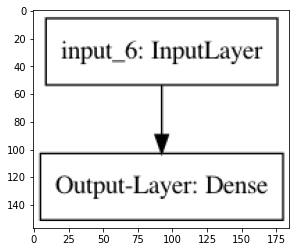

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

tf.keras.utils.plot_model(model, to_file="model.png")

img = plt.imread("model.png")
plt.imshow(img)
plt.show()

## Category Embeddings

* Inputs are integers
* Outputs are floats
* It increases dimensionality, so we have to flatten it back to a 2d layer


```python
# Imports
from keras.layers import Embedding
from numpy import unique

# Count the unique number of teams
n_teams = unique(games_season["team_1"]).shape[0]

# Create an embedding layer
# This will increase the dimensionality of your data
# Input has two dimensions (rows and columns) and this will add a 3rd dimension
# This 3rd dimension is useful for images/text, but not here. 
# Which is why we use the Flatten layer to reduce it back to 2d
# "The embedding layer is a lot like a dictionary, but your model learns the values for each key."
team_lookup = Embedding(input_dim=n_teams,
    # We want to produce a single team strength rating
    output_dim=1,
    # Because each team is represented by a single integer, we use an input length of 1
    input_length=1,
    # Name it so we can easily find it when looking at the model summary or plot
    name='Team-Strength')

# Imports
from keras.layers import Input, Embedding, Flatten
from keras.models import Model

# Create an input layer for the team ID
teamid_in = Input(shape=(1,))

# Lookup the input in the team strength embedding layer
strength_lookup = team_lookup(teamid_in)

# Flatten the output
# Reduce from multiple dimensions back down to 2 dimensions
# Useful for time series, text, and images
strength_lookup_flat = Flatten()(strength_lookup)

# Combine the operations into a single, re-usable model
team_strength_model = Model(teamid_in, strength_lookup_flat, name='Team-Strength-Model')
```

## Estimators

via [DataCamp](https://campus.datacamp.com/courses/introduction-to-tensorflow-in-python/63345?ex=11):

```python
# Define feature columns for bedrooms and bathrooms
bedrooms = feature_column.numeric_column("bedrooms")
bathrooms = feature_column.numeric_column("bathrooms")

# Define the list of feature columns
feature_list = [bedrooms, bathrooms]

def input_fn():
    # Define the labels
    labels = np.array(housing["price"])
    # Define the features
    features = {'bedrooms':np.array(housing['bedrooms']), 
                'bathrooms':np.array(housing["bathrooms"])}
    return features, labels
```

```python
# Define the model and set the number of steps
model = estimator.DNNRegressor(feature_columns=feature_list, hidden_units=[2,2])
model.train(input_fn, steps=1)
```

"Note that you have other premade estimator options, such as BoostedTreesRegressor(), and can also create your own custom estimators."[#](https://campus.datacamp.com/courses/introduction-to-tensorflow-in-python/63345?ex=12)

```python
# Define the model and set the number of steps
model = estimator.LinearRegressor(feature_columns=feature_list)
model.train(input_fn, steps=2)
```

## Convulutional Neural Networks

```python
# Import the Conv2D and Flatten layers and instantiate model
from keras.layers import Conv2D, Flatten
model = Sequential()

# Add a convolutional layer of 32 filters of size 3x3
model.add(Conv2D(32, kernel_size = 3, input_shape = (28, 28, 1), activation = 'relu'))

# Add a convolutional layer of 16 filters of size 3x3
model.add(Conv2D(16, kernel_size = 3, activation = "relu"))

# Flatten the previous layer output
model.add(Flatten())

# Add as many outputs as classes with softmax activation
model.add(Dense(10, activation = 'softmax'))
```

Plotting convolutions:
    
```python
# Obtain a reference to the outputs of the first layer
first_layer_output = model.layers[0].output

# Build a model using the model's input and the first layer output
first_layer_model = Model(inputs = model.layers[0].input, outputs = first_layer_output)

# Use this model to predict on X_test
activations = first_layer_model.predict(X_test)

# Plot the activations of first digit of X_test for the 15th filter
axs[0].matshow(activations[0,:,:,14], cmap = 'viridis')

# Do the same but for the 18th filter now
axs[1].matshow(activations[0,:,:,18], cmap = 'viridis')
plt.show()
```

## ResNet50

From [Introduction to Deep Learning with Keras](https://campus.datacamp.com/courses/introduction-to-deep-learning-with-keras/advanced-model-architectures?ex=9):

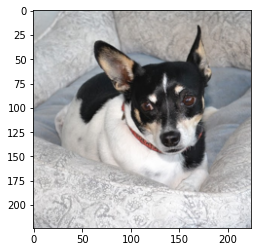

Predictions:

toy_terrier: 94%
Chihuahua: 3%
kelpie: 1%


In [254]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

# Load the image with the right target size for your model
img_path = "data/sola.png"
img = image.load_img(img_path, target_size=(224, 224))

# Turn it into an array
img_array = image.img_to_array(img)

# Expand the dimensions of the image, this is so that it fits the expected model input format
img_expanded = np.expand_dims(img_array, axis=0)

# Pre-process the img in the same way original images were
img_ready = preprocess_input(img_expanded)

# Instantiate a ResNet50 model with 'imagenet' weights
model = ResNet50(weights="imagenet")

# Predict with ResNet50 on your already processed img
preds = model.predict(img_ready)

plt.imshow(img)
plt.show()

# Decode the first 3 predictions
print("Predictions:\n")
for prediction in decode_predictions(preds, top=3)[0]:
    print("{}: {:.0%}".format(prediction[1], prediction[2]))

## LSTM

Inspired by [Introduction to Deep Learning with Keras](https://campus.datacamp.com/courses/introduction-to-deep-learning-with-keras/advanced-model-architectures?ex=12)

In [255]:
# Grabbing Macbeth text
import nltk
from nltk.tokenize import word_tokenize

macbeth = nltk.corpus.gutenberg.raw('shakespeare-macbeth.txt')

words = [token for token in word_tokenize(text.lower()) if token.isalpha()]
vocab_size = len(set(words))

print(words[:20])
print("\nVocab size:", vocab_size)

['the', 'tragedie', 'of', 'macbeth', 'by', 'william', 'shakespeare', 'actus', 'primus', 'scoena', 'prima', 'thunder', 'and', 'lightning', 'enter', 'three', 'witches', 'when', 'shall', 'we']

Vocab size: 676


## Converting words to sequences of numbers

In [256]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Make sentences of 4 words each, moving one word at a time
seq_len = 4
sentences = []
for i in range(seq_len, len(words)):
  sentences.append(' '.join(words[i-seq_len:i]))

# Instantiate a Tokenizer, then fit it on the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

# Turn sentences into a sequence of numbers
sequences = tokenizer.texts_to_sequences(sentences)
print("Sentences:\n", sentences[:20])
print("\nSequences ({}):\n{}".format(len(sequences), sequences[:20]))

Sentences:
 ['the tragedie of macbeth', 'tragedie of macbeth by', 'of macbeth by william', 'macbeth by william shakespeare', 'by william shakespeare actus', 'william shakespeare actus primus', 'shakespeare actus primus scoena', 'actus primus scoena prima', 'primus scoena prima thunder', 'scoena prima thunder and', 'prima thunder and lightning', 'thunder and lightning enter', 'and lightning enter three', 'lightning enter three witches', 'enter three witches when', 'three witches when shall', 'witches when shall we', 'when shall we three', 'shall we three meet', 'we three meet againe']

Sequences (1666):
[[1, 674, 3, 15], [674, 3, 15, 56], [3, 15, 56, 224], [15, 56, 224, 225], [56, 224, 225, 226], [224, 225, 226, 227], [225, 226, 227, 228], [226, 227, 228, 229], [227, 228, 229, 84], [228, 229, 84, 2], [229, 84, 2, 122], [84, 2, 122, 48], [2, 122, 48, 85], [122, 48, 85, 86], [48, 85, 86, 57], [85, 86, 57, 33], [86, 57, 33, 65], [57, 33, 65, 85], [33, 65, 85, 123], [65, 85, 123, 124]]


In [257]:
from tensorflow.keras.utils import to_categorical

train_inputs = np.array(sequences)[:, :-1]
train_targets = np.array(sequences)[:, -1]

print("Inputs {}:\n\n {}".format(train_inputs.shape, train_inputs))
print("\nTargets {}:\n\n {}".format(train_targets.shape, train_targets))

train_targets_categorical = to_categorical(train_targets)
print("\nTargets Categorical {}:\n\n {}".format(train_targets_categorical.shape, train_targets_categorical))

Inputs (1666, 3):

 [[  1 674   3]
 [674   3  15]
 [  3  15  56]
 ...
 [672 673  13]
 [673  13   4]
 [ 13   4  83]]

Targets (1666,):

 [ 15  56 224 ...   4  83 675]

Targets Categorical (1666, 676):

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


> "Remember your sequences had 4 words each, your model will be trained on the first three words of each sequence, predicting the 4th one. You are going to use an Embedding layer that will essentially learn to turn words into vectors. These vectors will then be passed to a simple LSTM layer. Our output is a Dense layer with as many neurons as words in the vocabulary and softmax activation. This is because we want to obtain the highest probable next word out of all possible words." [#](https://campus.datacamp.com/courses/introduction-to-deep-learning-with-keras/advanced-model-architectures?ex=13)

In [258]:
# Import the Embedding, LSTM and Dense layer
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = keras.Sequential()

# Add an Embedding layer with the right parameters
# Input length is 3 because we're going to train on the first 3 words to predict the 4th
model.add(Embedding(input_dim=vocab_size, input_length=seq_len-1, output_dim=8))

# Add a 32 unit LSTM layer
model.add(LSTM(32))

# Add a hidden Dense layer of 32 units and an output layer of vocab_size with softmax
model.add(Dense(32, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

print("\nSummary:")
model.summary()


Summary:
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 3, 8)              5408      
_________________________________________________________________
lstm_16 (LSTM)               (None, 32)                5248      
_________________________________________________________________
dense_34 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_35 (Dense)             (None, 676)               22308     
Total params: 34,020
Trainable params: 34,020
Non-trainable params: 0
_________________________________________________________________


> You'll see that this model is powerful enough to learn text relationships, we aren't using a lot of text in this tiny example and our sequences are quite short. This model is to be trained as usual, you would just need to compile it with an optimizer like adam and use crossentropy loss. This is because we have modeled this next word prediction task as a classification problem with all the unique words in our vocabulary as candidate classes. [#](https://campus.datacamp.com/courses/introduction-to-deep-learning-with-keras/advanced-model-architectures?ex=13)

In [259]:
model.compile(optimizer="adam", loss="categorical_crossentropy")
model.fit(train_inputs, train_targets_categorical, epochs=1000, verbose=0)

In [272]:
def predict_text(test_text, model = model):
    if len(test_text.split()) != seq_len - 1:
        print('Text input should be 3 words!')
        return False

    # Turn the test_text into a sequence of numbers
    test_seq = tokenizer.texts_to_sequences([test_text])
    if len(test_seq[0]) != seq_len - 1:
        print("Text input contains token not in the training data")
        return False

    test_seq = np.array(test_seq)

    # Use the model passed as a parameter to predict the next word
    pred = model.predict(test_seq).argmax(axis=1)[0]

    # Return the word that maps to the prediction
    return tokenizer.index_word[pred]

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Probably a bug somewhere because this is leading to strange output
predict_text("macbeth is a")

'rebels'